In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [75]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [78]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [79]:
df.shape

(7043, 21)

In [80]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

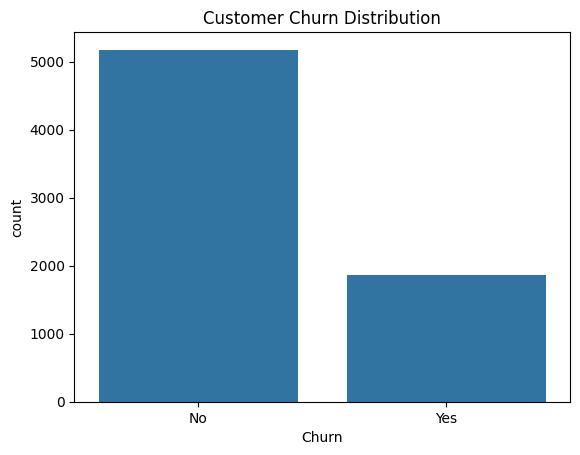

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [81]:
# Count of Churn
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

# Percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


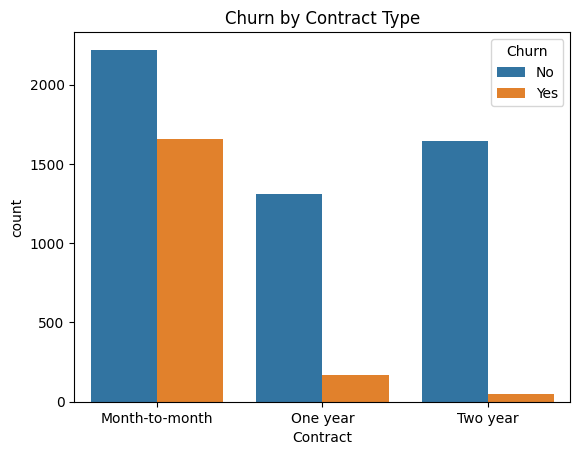

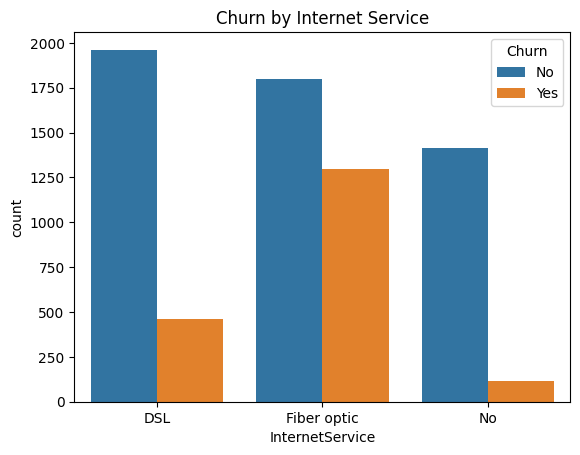

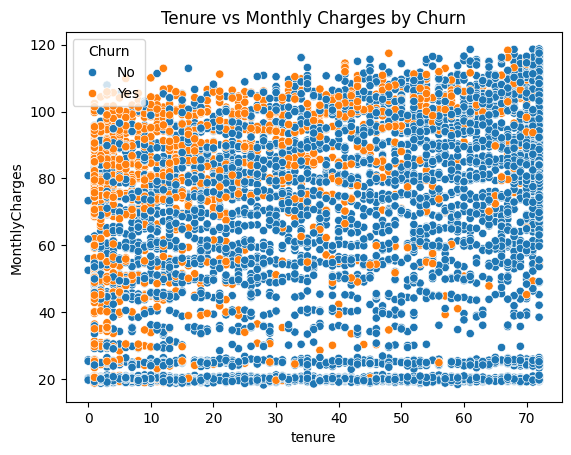

In [82]:
# Churn vs Contract Type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

# Churn vs Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()

# Tenure vs MonthlyCharges
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges by Churn')
plt.show()


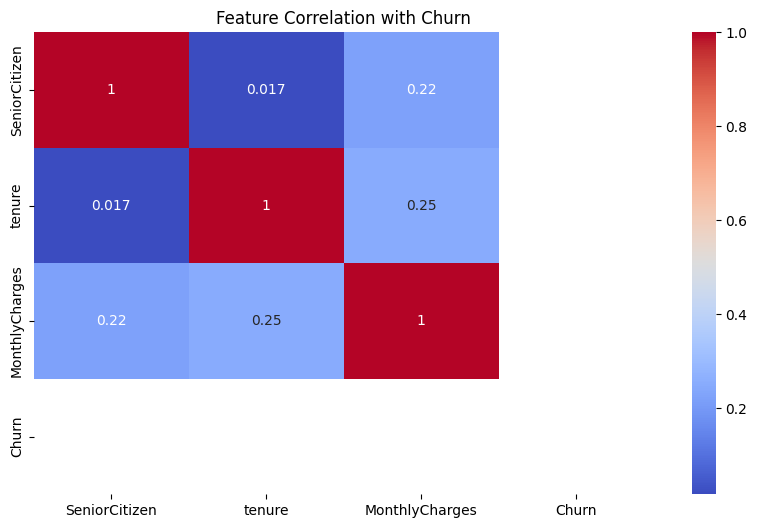

In [83]:


# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Churn')
plt.show()


In [84]:
pd.crosstab(df['Contract'], df['PaymentMethod'], normalize='index')

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,0.152000,0.140129,0.477419,0.230452
One year,0.265445,0.270197,0.235574,0.228785
Two year,0.332743,0.342773,0.099115,0.225369


In [85]:
df.drop(columns='customerID',inplace=True)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [89]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)


In [90]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Gradient Boosting", y_test, gb_pred)



 Model: Decision Tree
Accuracy: 0.7601135557132718
Confusion Matrix:
 [[889 146]
 [192 182]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.86      0.84      1035
        True       0.55      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409


 Model: Random Forest
Accuracy: 0.7955997161107168
Confusion Matrix:
 [[947  88]
 [200 174]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.91      0.87      1035
        True       0.66      0.47      0.55       374

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409


 Model: Gradient Boosting
Accuracy: 0.7934705464868701
Confusion Matrix:
 [[937  98]
 [193 181]]
Classificati

In [93]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC (Random Forest):", roc_auc_score(y_test, rf_pred))
print("ROC-AUC (Gradient Boost):", roc_auc_score(y_test, gb_pred))

ROC-AUC (Random Forest): 0.690108243560929
ROC-AUC (Gradient Boost): 0.6946356144565862


In [94]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [97]:
# Define parameter grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

rf_grid.fit(x_train, y_train)

print("✅ Best Random Forest Parameters:", rf_grid.best_params_)
print("🎯 Best Cross-Validation Accuracy:", rf_grid.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
✅ Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
🎯 Best Cross-Validation Accuracy: 0.8012045686295213


In [99]:
rf_best = rf_grid.best_estimator_
y_pred_rf_best = rf_best.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("🚀 Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))


🚀 Tuned Random Forest Accuracy: 0.8005677785663591
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.92      0.87      1035
        True       0.68      0.47      0.55       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[954  81]
 [200 174]]


In [100]:
gb_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

gb = GradientBoostingClassifier(random_state=42)

gb_grid = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_params,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)

gb_grid.fit(x_train, y_train)

print("✅ Best Gradient Boosting Parameters:", gb_grid.best_params_)
print("🎯 Best Cross-Validation Accuracy:", gb_grid.best_score_)


✅ Best Gradient Boosting Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 4, 'learning_rate': 0.1}
🎯 Best Cross-Validation Accuracy: 0.8026248973602879


In [101]:
gb_best = gb_grid.best_estimator_
y_pred_gb_best = gb_best.predict(x_test)

print("🚀 Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb_best))

# Compare both tuned models
print("\n📊 Model Comparison:")
print("Random Forest (Tuned):", accuracy_score(y_test, y_pred_rf_best))
print("Gradient Boosting (Tuned):", accuracy_score(y_test, y_pred_gb_best))


🚀 Tuned Gradient Boosting Accuracy: 0.8041163946061036

📊 Model Comparison:
Random Forest (Tuned): 0.8005677785663591
Gradient Boosting (Tuned): 0.8041163946061036


In [102]:
scores = cross_val_score(rf_best, x, y, cv=5, scoring='accuracy')
print("📈 Cross-validation mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


📈 Cross-validation mean accuracy: 0.796253286502355
Standard deviation: 0.01209166123894968


C:\Users\febin\AppData\Local\Temp\ipykernel_6060\586889185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette='viridis')


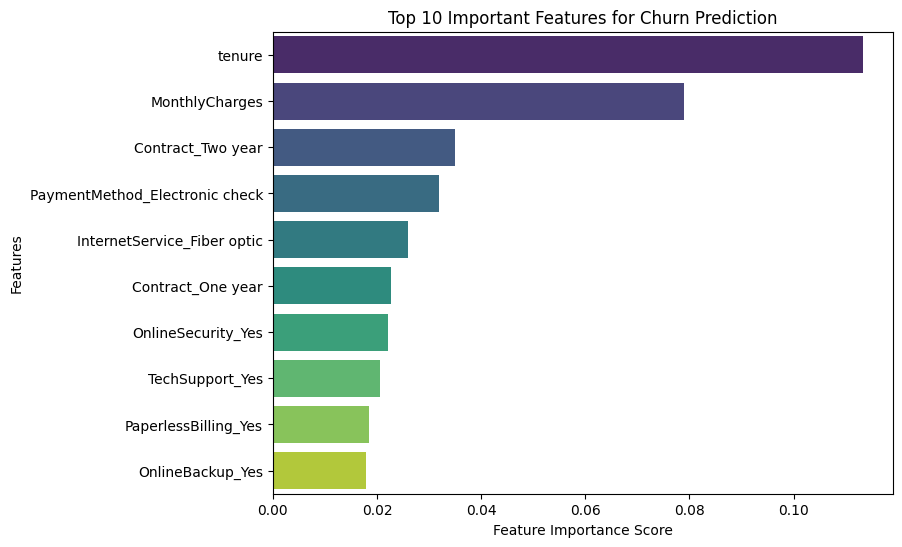

In [104]:
feat_importances = pd.Series(rf_best.feature_importances_, index=x.columns)
top_features = feat_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')
plt.title('Top 10 Important Features for Churn Prediction')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

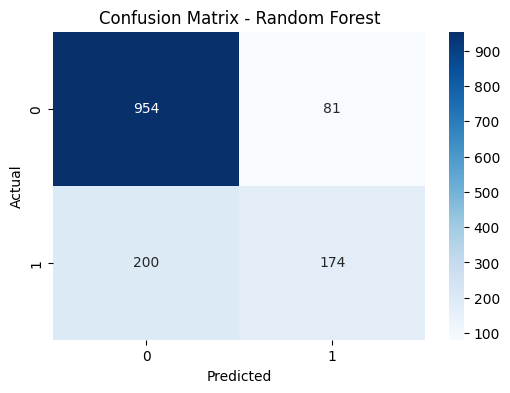

In [105]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


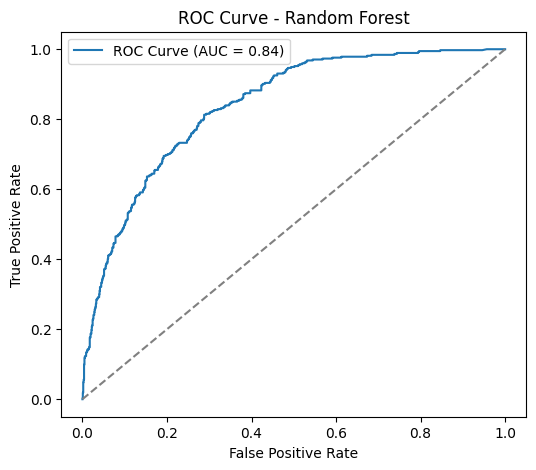

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf_best.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
